**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs"
txt_folder = "region"
txt_fdiry  = file.path(FD_RES, txt_folder, txt_region)
txt_fname  = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, col_names = FALSE, show_col_types = FALSE)
colnames(dat) = c("Chrom", "ChromStart", "ChromEnd")

dat_region_atac = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150042      3


Chrom,ChromStart,ChromEnd
chr1,10038,10405
chr1,14282,14614
chr1,16025,16338


In [3]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_folder = "region_coverage_fcc"
txt_fdiry  = file.path(FD_RES, txt_folder, txt_region, "summary")
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_score_fcc = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [5]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_folder = "region_annotation"
txt_fdiry  = file.path(FD_RES, txt_folder, txt_region, "summary")
txt_fname  = "region.summary.encode_e2g_benchmark.regulated.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_annot_e2g = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 3035    6


Chrom,ChromStart,ChromEnd,Region,Regulated_Ifany,Regulated_Count
chr1,3774056,3776283,chr1:3774056-3776283,TRUE,3
chr1,3803955,3806146,chr1:3803955-3806146,FALSE,0
chr1,4126841,4128109,chr1:4126841-4128109,FALSE,0


In [6]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_folder = "region_annotation"
txt_fdiry  = file.path(FD_RES, txt_folder, txt_region, "summary")
txt_fname  = "region.summary.fcc_peak_call.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_annot_fcc = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 156326      8


Chrom,ChromStart,ChromEnd,Region,Group,Label,Label2,Label3
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R,ASTARR_R,Repress (R)


## Arrange table: Coverage

In [41]:
dat  = dat_region_atac
dat  = dat %>% dplyr::mutate(
    Region = fun_gen_region(Chrom, ChromStart, ChromEnd), 
    Assay_Label = "ATAC"
)
dat1 = dat

dat  = dat_region_score_fcc
dat  = dat %>% dplyr::select(Chrom, ChromStart, ChromEnd, Region, Assay_Label)
dat2 = dat

dat  = dat_region_annot_e2g
dat  = dat %>% 
    dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>%
    dplyr::mutate(Assay_Label = "E2G-Benchmark")
dat3 = dat

dat = bind_rows(dat1, dat2, dat3)
dat = dat %>% dplyr::distinct()

dat_region_screen = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 585582      5


Chrom,ChromStart,ChromEnd,Region,Assay_Label
chr1,10038,10405,chr1:10038-10405,ATAC
chr1,14282,14614,chr1:14282-14614,ATAC
chr1,16025,16338,chr1:16025-16338,ATAC


In [42]:
dat = dat_region_screen
table(dat$Assay_Label)


                ATAC           ATAC-STARR       CRISPRi-Growth 
              150042               150040                72743 
CRISPRi-HCR FlowFISH        E2G-Benchmark           Lenti-MPRA 
                 941                 3035                61478 
         Tiling-MPRA            WHG-STARR 
                 823               146480 

## Arrange table: Significant

In [54]:
dat = dat_region_score_fcc
dat = dat %>% dplyr::select(Assay_Type, Assay_Label) %>% dplyr::distinct()
colnames(dat) = c("Group", "Assay_Label")

dat_assay_label = dat
fun_display_table(dat)

Group,Assay_Label
CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
CRISPRi-Growth,CRISPRi-Growth
LMPRA,Lenti-MPRA
TMPRA,Tiling-MPRA
ASTARR,ATAC-STARR
WSTARR,WHG-STARR


In [55]:
dat  = dat_region_annot_fcc
dat  = dat %>% 
    dplyr::left_join(dat_assay_label, by = "Group") %>%
    dplyr::select(Region, Assay_Label)
dat1 = dat

dat  = dat_region_annot_e2g
dat  = dat %>% 
    dplyr::filter(Regulated_Ifany) %>%
    dplyr::select(Region) %>%
    dplyr::mutate(Assay_Label = "E2G-Benchmark")
dat2 = dat

dat = bind_rows(dat1, dat2)
dat = dat %>% dplyr::distinct()

dat_region_signif = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 146643      2


Region,Assay_Label
chr1:10038-10405,ATAC-STARR
chr1:16025-16338,ATAC-STARR
chr1:17288-17689,ATAC-STARR


## Summary

In [56]:
dat = dat_region_screen
vec = dat$Region
vec = unique(vec)

vec_txt_peak_total = vec
print(length(vec))

[1] 150042


In [58]:
dat = dat_region_signif
lst = split(dat$Region, dat$Assay_Label)

lst_vec_txt_peak_signif = lst
names(lst)

[1] "ATAC-STARR"           "CRISPRi-Growth"       "CRISPRi-HCR FlowFISH"
[4] "E2G-Benchmark"        "Lenti-MPRA"           "Tiling-MPRA"         
[7] "WHG-STARR"

In [60]:
### init
dat = dat_region_screen
lst = split(dat$Region, dat$Assay_Label)

lst_vec_txt_peak_screen = lst
names(lst)

[1] "ATAC"                 "ATAC-STARR"           "CRISPRi-Growth"      
[4] "CRISPRi-HCR FlowFISH" "E2G-Benchmark"        "Lenti-MPRA"          
[7] "Tiling-MPRA"          "WHG-STARR"

### Summary: Coverage

In [69]:
### calculate the percentage of fcc atac peaks in total atac peaks
lst = lst_vec_txt_peak_screen
lst = lapply(lst, function(vec_txt_peak_screen){
    ### overlap and summarize
    vec = (vec_txt_peak_total %in% vec_txt_peak_screen)
    num_count = sum(vec)
    num_freq  = mean(vec)

    ### arrange results
    res = list(num_count, num_freq)
    names(res) = c("Count", "Freq")
    return(res)
})

### combine results
dat = bind_rows(lst, .id = "Assay")
dat = dat %>%
    dplyr::mutate(
        Count_Label = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, " ", "(", Count_Label, ")")
    )

### assign and show
dat_peak_atac_coverage = dat
print(dim(dat))
dat

[1] 8 5


Assay,Count,Freq,Count_Label,Assay_Label
<chr>,<int>,<dbl>,<chr>,<chr>
ATAC,150042,1.000000000,150K,ATAC (150K)
ATAC-STARR,150040,0.999986670,150K,ATAC-STARR (150K)
CRISPRi-Growth,72743,0.484817584,73K,CRISPRi-Growth (73K)
CRISPRi-HCR FlowFISH,941,0.006271577,941,CRISPRi-HCR FlowFISH (941)
E2G-Benchmark,3035,0.020227670,3K,E2G-Benchmark (3K)
Lenti-MPRA,61478,0.409738607,61K,Lenti-MPRA (61K)
Tiling-MPRA,823,0.005485131,823,Tiling-MPRA (823)
WHG-STARR,146480,0.976259981,146K,WHG-STARR (146K)


### Summary: Significant

In [73]:
lst = lst_vec_txt_peak_signif
vec_txt_assay = names(lst)

lst = lapply(vec_txt_assay, function(txt_assay){

    vec_txt_peak_screen = lst_vec_txt_peak_screen[[txt_assay]]
    vec_txt_peak_signif = lst_vec_txt_peak_signif[[txt_assay]]
    
    ### overlap and summarize
    vec = (vec_txt_peak_screen %in% vec_txt_peak_signif)
    num_count = sum(vec)
    num_freq  = mean(vec)

    ### arrange results
    res = list(txt_assay, num_count, num_freq)
    names(res) = c("Assay", "Count", "Freq")
    return(res)
})

### combine results
dat = bind_rows(lst)
dat = dat %>%
    dplyr::mutate(
        Count_Label = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, " ", "(", Count_Label, ")")
    )

### assign and show
dat_peak_atac_call_rate = dat
print(dim(dat))
dat

[1] 7 5


Assay,Count,Freq,Count_Label,Assay_Label
<chr>,<int>,<dbl>,<chr>,<chr>
ATAC-STARR,90765,0.60493868,91K,ATAC-STARR (91K)
CRISPRi-Growth,4347,0.05975833,4K,CRISPRi-Growth (4K)
CRISPRi-HCR FlowFISH,56,0.05951116,56,CRISPRi-HCR FlowFISH (56)
E2G-Benchmark,360,0.11861614,360,E2G-Benchmark (360)
Lenti-MPRA,20675,0.33629916,21K,Lenti-MPRA (21K)
Tiling-MPRA,577,0.70109356,577,Tiling-MPRA (577)
WHG-STARR,29328,0.20021846,29K,WHG-STARR (29K)


## Plot ATAC coverage

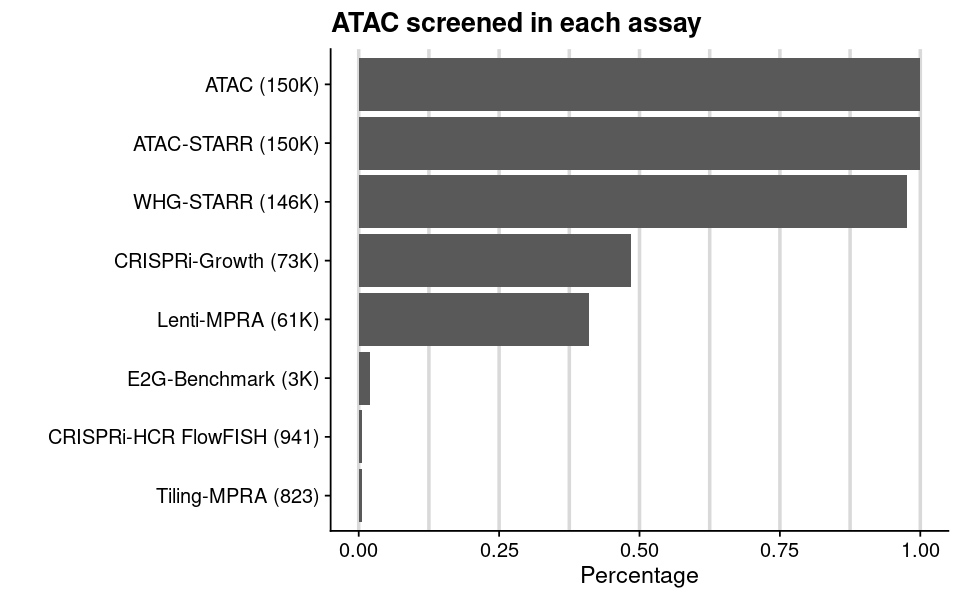

In [76]:
dat = dat_peak_atac_coverage
dat = dat %>% 
    dplyr::arrange(Freq) %>% 
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x = Freq, y = Assay_Label)) +
    geom_col() +
    labs(x = "Percentage", y = "", title = "ATAC screened in each assay") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    )

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)
#ggsave("fig.fcc_assay.atac.coverage.png", gpt, width = 6.5, height = 4.5)
#ggsave("fig.fcc_assay.atac.coverage.pdf", gpt, width = 6.5, height = 4.5)

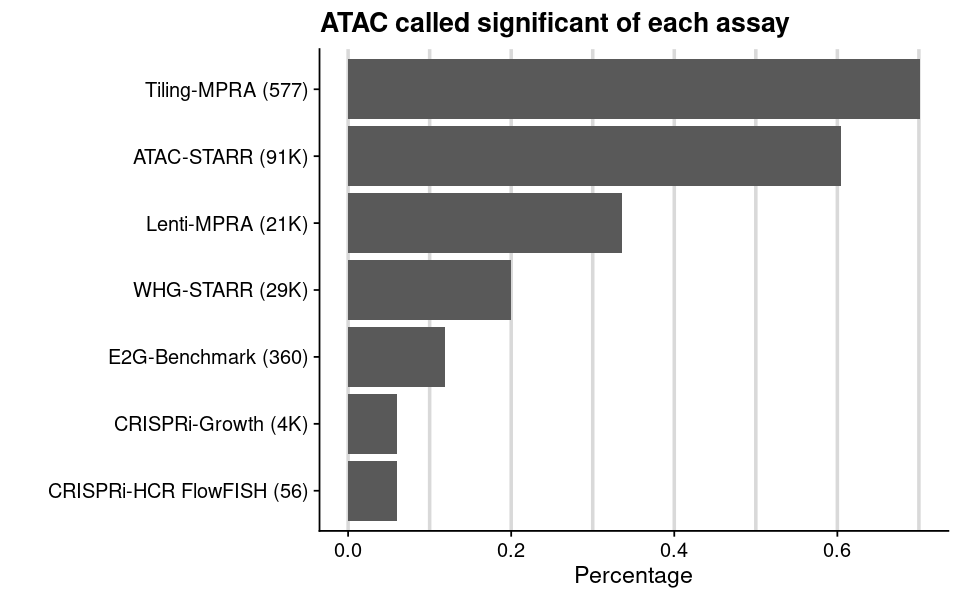

In [77]:
dat = dat_peak_atac_call_rate
dat = dat %>% 
    dplyr::arrange(Freq) %>% 
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x = Freq, y = Assay_Label)) +
    geom_col() +
    labs(x = "Percentage", y = "", title = "ATAC called significant of each assay") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    )

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)
#ggsave("fig.fcc_assay.atac.coverage.png", gpt, width = 6.5, height = 4.5)
#ggsave("fig.fcc_assay.atac.coverage.pdf", gpt, width = 6.5, height = 4.5)